In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_df=pd.read_csv("Loan_prediction_AV_train.csv")

In [3]:
loan_df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
loan_df=loan_df.drop('Loan_ID',axis=1)

In [5]:
dict1=dict(loan_df.dtypes)
cat=[]
num=[]
for i in dict1:
    if dict1[i]=='O':
        cat.append(i)
    else:
        num.append(i)

In [6]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [7]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

**Missing values analysis**

$Categorical$

In [8]:
loan_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
gm = loan_df['Gender'].mode()[0]
loan_df['Gender'] = loan_df['Gender'].fillna(gm)

In [10]:
loan_df['Gender'].isnull().sum()

0

In [11]:
mm = loan_df['Married'].mode()[0]
loan_df['Married'] = loan_df['Married'].fillna(mm)

In [12]:
loan_df['Married'].isnull().sum()

0

In [13]:
dm = loan_df[ 'Dependents'].mode()[0]
loan_df[ 'Dependents'] = loan_df[ 'Dependents'].fillna(dm)

In [14]:
loan_df[ 'Dependents'].isnull().sum()

0

In [15]:
dm = loan_df['Self_Employed'].mode()[0]
loan_df['Self_Employed'] = loan_df['Self_Employed'].fillna(dm)

In [16]:
loan_df['Self_Employed'].isnull().sum()

0

In [17]:
#====================================================================

**Numerical data missing values**

<Axes: >

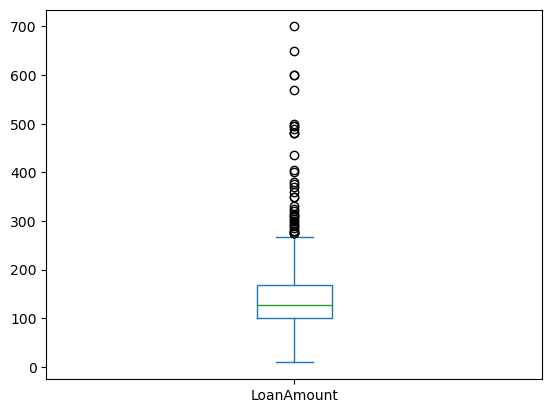

In [18]:
loan_df['LoanAmount'].plot(kind='box')

In [19]:
la_med=loan_df['LoanAmount'].median()
loan_df['LoanAmount']=loan_df['LoanAmount'].fillna(la_med)

In [20]:
loan_df['LoanAmount'].isnull().sum()

0

<Axes: >

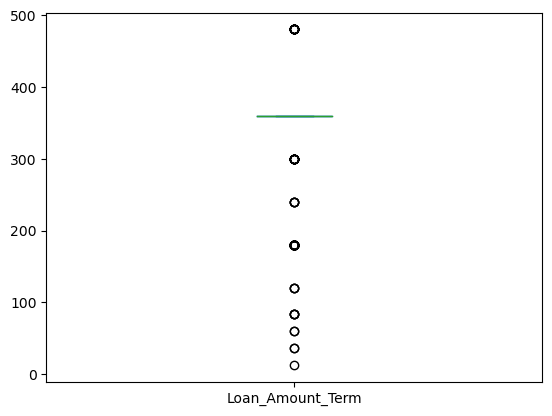

In [21]:
loan_df['Loan_Amount_Term'].plot(kind='box')

In [22]:
lat_med=loan_df['Loan_Amount_Term'].median()
loan_df['Loan_Amount_Term']=loan_df['Loan_Amount_Term'].fillna(lat_med)

In [23]:
loan_df['Loan_Amount_Term'].isnull().sum()

0

<Axes: >

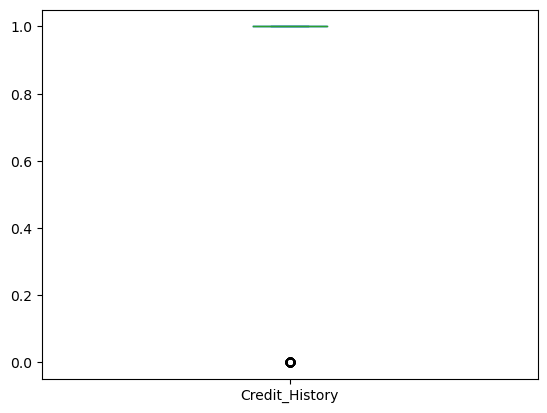

In [24]:
loan_df['Credit_History'].plot(kind='box')

In [25]:
cr_med=loan_df['Credit_History'].median()
loan_df['Credit_History']=loan_df['Credit_History'].fillna(cr_med)

In [26]:
loan_df['Credit_History'].isnull().sum()

0

In [27]:
loan_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
#===============================================================================================================================

**Outlier analysis**

$Loan -amount$

In [29]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [30]:
loan_df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [31]:
per_25=round(np.percentile(loan_df['ApplicantIncome'],25),2)
per_75=round(np.percentile(loan_df['ApplicantIncome'],75),2)
print(per_25,per_75)

2877.5 5795.0


In [32]:
iqr=per_75 - per_25
iqr

2917.5

In [33]:
ul=per_75+1.5*iqr
ll=per_25-1.5*iqr
print(ul,ll)

10171.25 -1498.75


In [34]:
new_df=loan_df.copy()

In [35]:
loan_df['ApplicantIncome']=np.where(loan_df['ApplicantIncome']>ul,ul,
                                   np.where(loan_df['ApplicantIncome']<ll,ll,
                                            new_df['ApplicantIncome']))

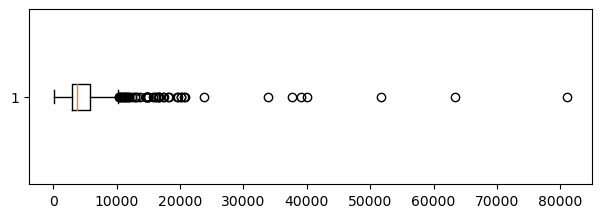

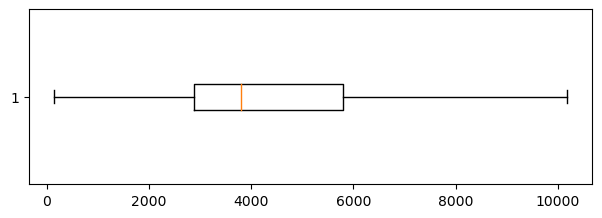

In [36]:
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
plt.boxplot(new_df['ApplicantIncome'],vert=0)
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(2,2,2)
plt.boxplot(loan_df['ApplicantIncome'],vert=0)
plt.show()

$2.Applicant-income$

<Axes: >

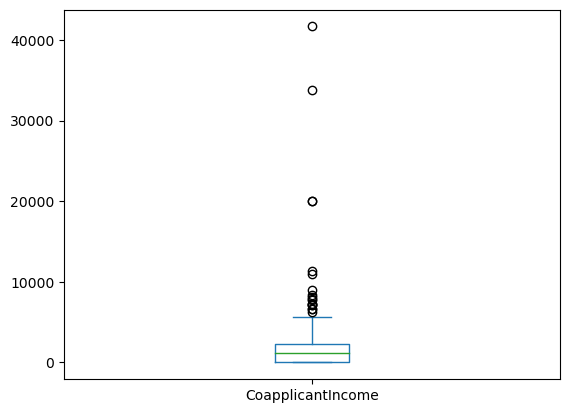

In [37]:
loan_df['CoapplicantIncome'].plot(kind='box')

In [38]:
loan_df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [39]:
per_25=round(np.percentile(loan_df['CoapplicantIncome'],25),2)
per_75=round(np.percentile(loan_df['CoapplicantIncome'],75),2)
print(per_25,per_75)

iqr=per_75 - per_25
print(iqr)

ul=per_75+1.5*iqr
ll=per_25-1.5*iqr
print(ul,ll)

0.0 2297.25
2297.25
5743.125 -3445.875


In [40]:
loan_df['CoapplicantIncome']=np.where(loan_df['CoapplicantIncome']>ul,ul,
                                   np.where(loan_df['CoapplicantIncome']<ll,ll,
                                            new_df['CoapplicantIncome']))

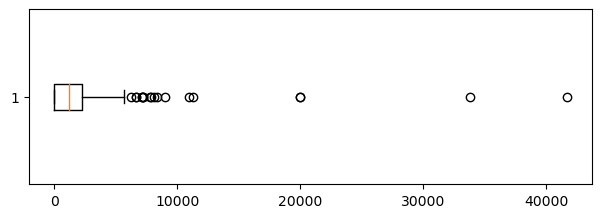

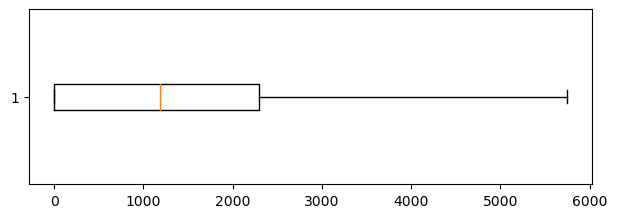

In [41]:
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
plt.boxplot(new_df['CoapplicantIncome'],vert=0)
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(2,2,2)
plt.boxplot(loan_df['CoapplicantIncome'],vert=0)
plt.show()

$3.Loan-amount$

In [42]:
loan_df['LoanAmount'].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [43]:
per_25=round(np.percentile(loan_df['LoanAmount'],25),2)
per_75=round(np.percentile(loan_df['LoanAmount'],75),2)
print(per_25,per_75)

iqr=per_75 - per_25
print(iqr)

ul=per_75+1.5*iqr
ll=per_25-1.5*iqr
print(ul,ll)

100.25 164.75
64.5
261.5 3.5


In [44]:
loan_df['LoanAmount']=np.where(loan_df['LoanAmount']>ul,ul,
                                   np.where(loan_df['LoanAmount']<ll,ll,
                                            new_df['LoanAmount']))

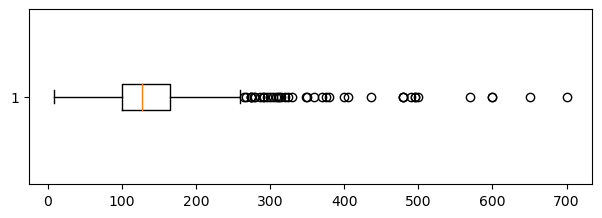

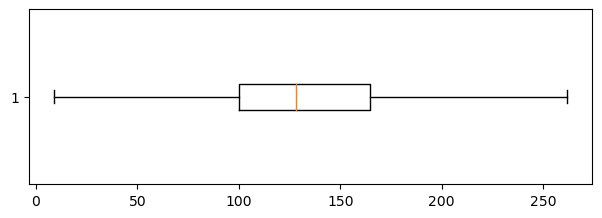

In [45]:
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
plt.boxplot(new_df['LoanAmount'],vert=0)
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(2,2,2)
plt.boxplot(loan_df['LoanAmount'],vert=0)
plt.show()

In [46]:
loan_df['Loan_Amount_Term'].describe()

count    614.000000
mean     342.410423
std       64.428629
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [47]:
per_25=round(np.percentile(loan_df['Loan_Amount_Term'],25),2)
per_75=round(np.percentile(loan_df['Loan_Amount_Term'],75),2)
print(per_25,per_75)

iqr=per_75 - per_25
print(iqr)

ul=per_75+1.5*iqr
ll=per_25-1.5*iqr
print(ul,ll)

360.0 360.0
0.0
360.0 360.0


In [48]:
loan_df['Loan_Amount_Term']=np.where(loan_df['Loan_Amount_Term']>ul,ul,
                                   np.where(loan_df['Loan_Amount_Term']<ll,ll,
                                            new_df['Loan_Amount_Term']))

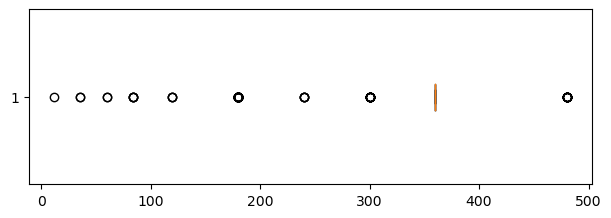

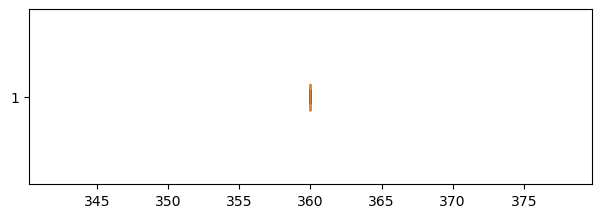

In [49]:
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
plt.boxplot(new_df['Loan_Amount_Term'],vert=0)
plt.show()

plt.figure(figsize=(16,5))
plt.subplot(2,2,2)
plt.boxplot(loan_df['Loan_Amount_Term'],vert=0)
plt.show()

In [50]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [51]:
loan_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [52]:
loan_df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [53]:
loan_df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [54]:
loan_df['Dependents']=loan_df['Dependents'].replace('3+','3')

In [55]:
loan_df['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [56]:
loan_df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [57]:
loan_df[ 'Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [58]:
loan_df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [59]:
loan_df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [60]:
dtypes=dict(loan_df.dtypes)
cat_columns=[i for i in dtypes if dtypes[i]=='O']

In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [62]:
for i in cat_columns:
          loan_df[i]=le.fit_transform(loan_df[i])

In [63]:
loan_df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [64]:
loan_df=loan_df.drop('Loan_Amount_Term',axis=1)

In [65]:
loan_df.to_csv('cleaned_train_loan_data.csv',index=False)